**Question 1**

In [ ]:
class Layers:

    def __init__(self, activation_function_forward, activation_function_backward, count_output_neuron, no_of_inputs, seed):
        self.activation_function_forward = activation_function_forward      # the forward activation function
        self.activation_function_backward = activation_function_backward    # the corresponding backward activation function
        self.count_output_neuron = count_output_neuron                  # taking the number of output neurons as a paramter
        self.no_of_inputs = no_of_inputs                                # taking the number of inputs for a given layer
        #self.X_train = X_train                                          # Training data X
        self.seed = seed                                        # seed parameter
        np.random.rand(seed)    # seed is used to maintain the same set of random values generated elsewhere in the class


        self.W = np.random.rand(no_of_inputs, count_output_neuron)
        self.bias = np.random.rand(count_output_neuron)


    def updateWeightGradient(self, dW, alpha):      # updating weights of the current layer to pass for the next layer
        self.W = self.W - alpha * dW

    def updateBiasGradient(self, dbias, alpha):     # updating bias of the current layer to pass for the next layer
        self.bias = self.bias - alpha * dbias


    # activate function which takes X as input and returns after activation function is called on (WX + B) matrix
    def activate(self, curr_input):
        self.curr_input = curr_input
        N = np.matmul(curr_input, self.W)
        P = N + self.bias

        self.curr_output = self.activation_function_forward(P)
        return self.curr_output

In [ ]:
class NeuralNetwork:
    def __init__(self, list_of_layers, loss, seed):
        self.list_of_layers = list_of_layers        # list of layers objects
        self.loss = loss                # loss object
        self.seed = seed
        np.random.seed(seed)


    # In the forward pass of neural network, we pass through all the layers such that output of current layer is the input for the next layer.
    # Finally, we return the output of the last layer
    def forward(self, X):
        curr_input = X
        for curr_layer in self.list_of_layers:
            next_input = curr_layer.activate(curr_input)
            curr_input = next_input

        output = curr_input

        output = np.array(output)
        return output

    # In the backward pass, we calcuate the error generated and also reverse traverse the layers and calculate the effect of loss w.r.t input X
    def backward(self, X, y_true, alpha):
        output = self.forward(X)

        error = self.loss.lossLayer_forward(output, y_true)   # calculating loss in forward pass
        dL_dA = self.loss.lossLayer_backward(output, y_true)    # calculating loss in backward pass

        weights = []    # store the weights of each layer so as to calculate optimal weights
        bias = []       # store the bias of each layer so as to calculate optimal bias

        for curr_layer in reversed(self.list_of_layers):

            dL_dP = curr_layer.activation_function_backward(curr_layer.curr_output, dL_dA)

            curr_layer.curr_input = np.array(curr_layer.curr_input)

            dW = np.matmul(curr_layer.curr_input.T, dL_dP)  # taking transpose
            dbias = np.sum(dL_dP)

            weights.append(curr_layer.W)
            bias.append(curr_layer.bias)

            curr_layer.updateWeightGradient(dW, alpha)
            curr_layer.updateBiasGradient(dbias, alpha)

            dL_dX = np.matmul(dL_dP, curr_layer.W.T)
            dL_dA = dL_dX


        return error,bias,weights

    # In this fucntion, we perform the entire procedure for several number of iterations and finally return error, weights, bias
    def SGD(self, X_train, y_train, X_test, y_test, loss):  # Stochastic Gradient Descent Algorithm
        arr = []
        iter = 10000
        graph_X = []
        graph_Y = []
        for i in range(iter):
            temp = []
            error,bias,weights = self.backward(X_train, Y_train, 0.001)
            #print('Error = ',error)
            temp.append(error)
            temp.append(bias)
            temp.append(weights)
            arr.append(temp)
            graph_X.append(i)
            graph_Y.append(error)
            if i % 1000 == 0:

                print(f'Error at iteration {i}: {error}')

        # Evaluate

        return arr,graph_X,graph_Y

In [ ]:
# This is mean square error class that calculates error in both forward and backward passes
class mean_square_error:

    def lossLayer_forward(self,P,Y):
        return np.mean((P - Y.reshape(-1, 1)) ** 2)

    def lossLayer_backward(self,P,Y): #sizes of both P and Y  = nx1

        nSamples = len(Y)
        dL_dA = np.zeros((nSamples,1))
        for i in range(nSamples):
            dL_dA[i][0] = (2*(P[i][0] - Y[i])) / nSamples

        return dL_dA  # returning dL/dP

        #return P-Y

In [ ]:
class cross_entropy_loss:
    def lossLayer_forward(self,P,Y):
        P = np.exp(P)
        P /= np.sum(P, axis=-1, keepdims=True)
        loss = -np.sum(Y * np.log(P))
        return loss

    def lossLayer_backward(self,P,Y):    #sizes of both P and Y  = nxc
        P = np.exp(P)
        #output -= np.max(output, axis=-1, keepdims=True)[0][0]
        P /= np.sum(P, axis=-1, keepdims=True)
        return P - Y

In [ ]:
# Implementations of several activation functions in both forward and backward passes

def linear_forward(P):
    return P

def linear_backward(P, dL_dA):
    shape = P.shape
    return dL_dA * np.ones(shape)


def sigmoid_forward(x):
        ans = 1 / (1 + np.exp(-x))
        return ans

def sigmoidLayer_forward(P):
    ans=[]
    for i in P:
        new = sigmoid_forward(i)
        ans.append(new)
    return ans

def sigmoidLayer_backward(P, dL_dA):
        dL_dP = []
        index = 0
        for i in P:
            new = sigmoid_forward(i)
            dL_dP.append(dL_dA[index] * (new * (1 - new)))  # dL/dP = dL/dA * sigmoid(P) * (1 - sigmoid(P))
            index += 1
        dL_dP = np.array(dL_dP)
        return dL_dP



def tanhLayer_forward(P):
    return np.tanh(P)
    '''
    ans=[]
    for i in P:
        new = tanh_forward(i)
        ans.append(new)
    return ans
    '''

def tanhLayer_backward(P, dL_dA):
    return dL_dA * (1 - np.tanh(P) ** 2)

    '''
    dL_dP = []
    index = 0
    for i in P:
        new = tanh_forward(2*i)  # i don't think this is correct
        dL_dP.append(dL_dA[index] * 4 * (1 - new))
        index += 1
    dL_dP = np.array(dL_dP)
    return dL_dP
    '''

In [ ]:
# Calculating the accuracy of the model


def test_model(list_of_layers, X_test, Y_test, threshold):
    accuracy = 0
    curr_X = X_test

    for i in range(len(Y_test)):
        N = np.matmul(curr_X[i], opt_weights[0])
        P = N + opt_bias[0]
        for j in range(len(list_of_layers)):
            output = list_of_layers[j].activation_function_forward(P)
            P = output

        if(abs(output[0] - Y_test[i]) <= threshold):
            accuracy += 1

    print("Accuracy =",100.0*accuracy/len(Y_test), "%")

**QUESTION 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading boston dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
boston = datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X = boston.data
print(X.shape)

Y = boston.target
print(Y.shape)

(506, 13)
(506,)


**QUESTION 2 PART 1**

Just one output neural with linear activation and least mean square loss.
(This is linear regression).

Error at iteration 0: 10.13030976718537
Error at iteration 1000: 0.6831179150764478
Error at iteration 2000: 0.42265106389689916
Error at iteration 3000: 0.33660052217330694
Error at iteration 4000: 0.30132991429159084
Error at iteration 5000: 0.2852454649610842
Error at iteration 6000: 0.2774823855151011
Error at iteration 7000: 0.273613350344865
Error at iteration 8000: 0.27164319672493675
Error at iteration 9000: 0.2706213954707267
min error =  0.2700814792337928
Mean Squared Error: 1.4480044888679628


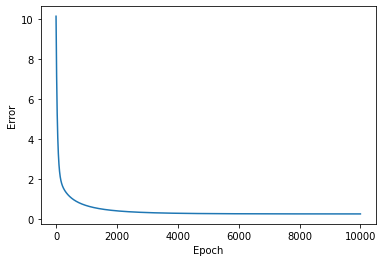

In [ ]:
# Normalizing the data
X = (X - np.mean(X, axis = 0)) / (np.std(X, axis = 0))
Y = (Y - np.mean(Y, axis = 0)) / (np.std(Y, axis = 0))

# Spliting the data with 85% into training and 15% into testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state = 30)

#print(Y_test.shape)
seed = 21

layer1 = Layers(linear_forward, linear_backward, 1, X_train.shape[1], seed)   # creating layers object
list_of_layers = [layer1]   # creating layers list

loss_obj = mean_square_error()  # creating loss object

NN_obj = NeuralNetwork(list_of_layers, loss_obj, seed)  # creating neural networks object


J, graph_X, graph_Y = NN_obj.SGD(X_train, Y_train, X_test, Y_test, loss_obj)    # calling SGD function in NeuralNetwork class
min_error = 1000000000

# Calculating the min error among the total samples
for i in range(len(J)):
    if(J[i][0] <= min_error):
      #optimum
        opt_weights = J[i][2]
        opt_bias = J[i][1]
        min_error = J[i][0]

print("min error = ",min_error)

Y_pred = NN_obj.forward(X_test)
mean_sqr_error = loss_obj.lossLayer_forward(Y_test, Y_pred)
print("Mean Squared Error:", mean_sqr_error)

plt.plot(graph_X, graph_Y)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()


In [ ]:
from sklearn.metrics import r2_score
y_pred = NN_obj.forward(X_test)
r_squared = r2_score(Y_test, y_pred)
print(f'R-squared value: {r_squared}')


R-squared value: 0.7511781956903447


In [ ]:
# Testing the accuracy of the model
test_model(list_of_layers, X_test, Y_test, 1)

Accuracy = 96.05263157894737 %


**QUESTION2 PART 2**

Two layers. Layer 1 with 13 output neurons with sigmoid activation. Layer
2 with one output neuron and linear activation. use mean squared loss

Error at iteration 0: 19.192542281898852
Error at iteration 1000: 0.667220512622075
Error at iteration 2000: 0.5289118895788787
Error at iteration 3000: 0.4757058631120525
Error at iteration 4000: 0.44124129075149937
Error at iteration 5000: 0.4161197397874516
Error at iteration 6000: 0.39786626498885447
Error at iteration 7000: 0.38475103108891456
Error at iteration 8000: 0.37533036722138063
Error at iteration 9000: 0.3684693433637104
min error =  0.3633431106438133
Mean Squared Error: 1.4322673216107624


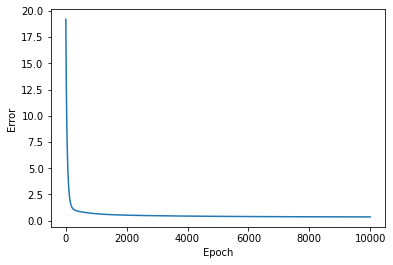

In [ ]:
# Normalizing the data
X = (X - np.mean(X, axis = 0)) / (np.std(X, axis = 0))
Y = (Y - np.mean(Y, axis = 0)) / (np.std(Y, axis = 0))

# Spliting the data with 85% into training and 15% into testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state = 30)

#print(Y_test.shape)
seed = 21

layer1 = Layers(sigmoidLayer_forward, sigmoidLayer_backward, 13, X_train.shape[1], seed)   # creating layers object
layer2 = Layers(linear_forward, linear_backward, 1, 13, seed)   # creating layers object
list_of_layers = [layer1, layer2]   # creating layers list

loss_obj = mean_square_error()  # creating loss object

NN_obj = NeuralNetwork(list_of_layers, loss_obj, seed)  # creating neural networks object


J, graph_X, graph_Y = NN_obj.SGD(X_train, Y_train, X_test, Y_test, loss_obj)    # calling SGD function in NeuralNetwork class
min_error = 1000000000

# Calculating the min error among the total samples
for i in range(len(J)):
    if(J[i][0] <= min_error):
      #optimum
        opt_weights = J[i][2]
        opt_bias = J[i][1]
        min_error = J[i][0]

print("min error = ",min_error)

Y_pred = NN_obj.forward(X_test)
mean_sqr_error = loss_obj.lossLayer_forward(Y_test, Y_pred)
print("Mean Squared Error:", mean_sqr_error)

plt.plot(graph_X, graph_Y)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()


In [ ]:
# Testing the accuracy of the model
test_model(list_of_layers, X_test, Y_test, 2)

Accuracy = 93.42105263157895 %


**Question-2 part 3**

Three layers. Layer 1 with 13 output neurons with sigmoid activation.
Layer 2 with 13 output neurons and sigmoid activation. Layer 3 with one
output neuron and linear activation. use mean squared loss

Error at iteration 0: 38.655545094843006
Error at iteration 1000: 1.0419460211404066
Error at iteration 2000: 1.0291700778398205
Error at iteration 3000: 1.0171291034498247
Error at iteration 4000: 1.0046394925732296
Error at iteration 5000: 0.9906540040473494
Error at iteration 6000: 0.9741677512733167
Error at iteration 7000: 0.9541842475456916
Error at iteration 8000: 0.9297447836229984
Error at iteration 9000: 0.8999911959842617
min error =  0.8641742166716717
Mean Squared Error: 0.8547307310132798


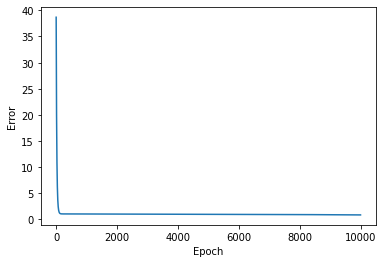

In [ ]:
# Normalizing the data
X = (X - np.mean(X, axis = 0)) / (np.std(X, axis = 0))
Y = (Y - np.mean(Y, axis = 0)) / (np.std(Y, axis = 0))

# Spliting the data with 85% into training and 15% into testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state = 30)

#print(Y_test.shape)
seed = 21

layer1 = Layers(sigmoidLayer_forward, sigmoidLayer_backward, 13, X_train.shape[1], seed)   # creating layers object
layer2 = Layers(sigmoidLayer_forward, sigmoidLayer_backward, 13, 13, seed)   # creating layers object
layer3 = Layers(linear_forward, linear_backward, 1, 13, seed)   # creating layers object
list_of_layers = [layer1, layer2, layer3]

loss_obj = mean_square_error()  # creating loss object

NN_obj = NeuralNetwork(list_of_layers, loss_obj, seed)  # creating neural networks object


J, graph_X, graph_Y = NN_obj.SGD(X_train, Y_train, X_test, Y_test, loss_obj)    # calling SGD function in NeuralNetwork class
min_error = 1000000000

# Calculating the min error among the total samples
for i in range(len(J)):
    if(J[i][0] <= min_error):
        opt_weights = J[i][2]
        opt_bias = J[i][1]
        min_error = J[i][0]

print("min error = ",min_error)

Y_pred = NN_obj.forward(X_test)
mean_sqr_error = loss_obj.lossLayer_forward(Y_test, Y_pred)
print("Mean Squared Error:", mean_sqr_error)

plt.plot(graph_X, graph_Y)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()


In [ ]:
# Testing the accuracy of the model
test_model(list_of_layers, X_test, Y_test, 2)

Accuracy = 96.05263157894737 %
